In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.decomposition import PCA
from matplotlib.offsetbox import AnchoredText
import matplotlib.pylab as pylab

%matplotlib inline

In [2]:
# load data
full_data = pd.read_csv("/home/lima/Projects/simulation/SingleSample/countsMatrixWithCutOff 0 .csv")
quaterCut = pd.read_csv("/home/lima/Projects/simulation/SingleSample/countsMatrixWithCutOff 2.5 .csv")
halfCut = pd.read_csv("/home/lima/Projects/simulation/SingleSample/countsMatrixWithCutOff 5 .csv")
threeQtrCut = pd.read_csv("/home/lima/Projects/simulation/SingleSample/countsMatrixWithCutOff 7.5 .csv")
tenCut = pd.read_csv("/home/lima/Projects/simulation/SingleSample/countsMatrixWithCutOff 10 .csv")

In [3]:
# plot violin and box plot
full_data = full_data.rename(columns = {"Unnamed: 0": "GeneID"})
quaterCut = quaterCut.rename(columns = {"Unnamed: 0": "GeneID"})
halfCut = halfCut.rename(columns = {"Unnamed: 0": "GeneID"})
threeQtrCut = threeQtrCut.rename(columns = {"Unnamed: 0": "GeneID"})
tenCut = tenCut.rename(columns = {"Unnamed: 0": "GeneID"})

In [4]:
# function corrScatterPlot is a helper function for scatter-plotting the correlation between two sets of data with 
# different colors. 
def corrScatterPlot(df, ax):
    """
    Input:
    @df: a pandas dataframe object which provides the data for plotting
    @ax: an axes object on which the plot is going to be plotted
    
    Output:
    an axes object
    """
    pca = PCA(n_components = 2)
    pca.fit(df)
    
    # take out the explained_variance_ for finding the one keeps the most variability
    variances = pca.explained_variance_
    
    # index records the index of the desired variances
    index = 0 if (variances[0] > variances[1]) else 1
    
    pcs = pca.transform(df)
    
    # take the variances
    pc = pcs[ : , index]
    
    # find the minimum components
    min_pc = np.amin(pc)

    # check if it is negative, make it non-negative and add it to pc
    if min_pc < 0:
        min_pc = np.abs(min_pc)
        pc = pc + min_pc
        
    #calculate the correlation between the two sets of data.
    corr = scipy.stats.pearsonr(df.iloc[ : , 0], df.iloc[ : , 1])[0]   
    plt.style.use('seaborn-whitegrid')
    ax.scatter(pc, df.iloc[ : , 0], s = 20, c = 'b', alpha = 0.05, marker = "s", label = 'Real')
    ax.scatter(pc, df.iloc[ : , 1], s = 20, c = 'r', alpha = 0.05, marker = "o", label = 'Simulated')
    
    at = AnchoredText("Corr: {corr}".format(corr = corr),
                  prop = dict(size = 40), frameon = True,
                  loc = 'upper left'
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    ax.set_xlabel("Simulated Data")
    ax.set_ylabel("Real Data")
    ax.set_title("Scatted plot for the correlation between real data and simulated data")
    ax.legend(loc = 'center left', fancybox = True, shadow = False, scatterpoints = 200, prop = {'size': 40});
    

In [5]:
def buildPlotBlock(df, axes):
    """
    buildPlotBlock is a helper function helping putting the desired plots, such as the scatter plot, box plot,
    violin plot and the distribution plot into a grided pyplot
    
    Input:
    @df: the dataframe which provides the data
    @axes: a 2x2 subplot matrix 
    """
    df = np.log2(df[['PDX_14P3_20_real', 'PDX_14P3_20_sim']] + 1)
    sns.set(style="white", palette="muted", color_codes=True)
    # put the violin plot to axes[0, 0]
    sns.violinplot(data = df, linewidth = 0.8, palette = "husl", ax = axes[0, 0])
    
    # put the boxplot to axes[1, 1]
    sns.boxplot(data = df, linewidth = 0.8, palette = "husl", ax = axes[1, 1])
    
    # put the distribution plot to axes[0, 1]
    sns.distplot(df.iloc[ : , 0], kde = True, color = "b", label = 'Real', ax = axes[0, 1])
    sns.distplot(df.iloc[ : , 1], kde = True, color = "r", label = 'Simulated', ax = axes[0, 1])
    axes[0, 1].legend(loc = 'center right', prop = {'size': 40})
    axes[0, 1].set_xlabel("Distribution plot for real data and simulated data")
    
    # put the scatter plot to axes [1, 0]
    corrScatterPlot(df, axes[1, 0])
    

[]

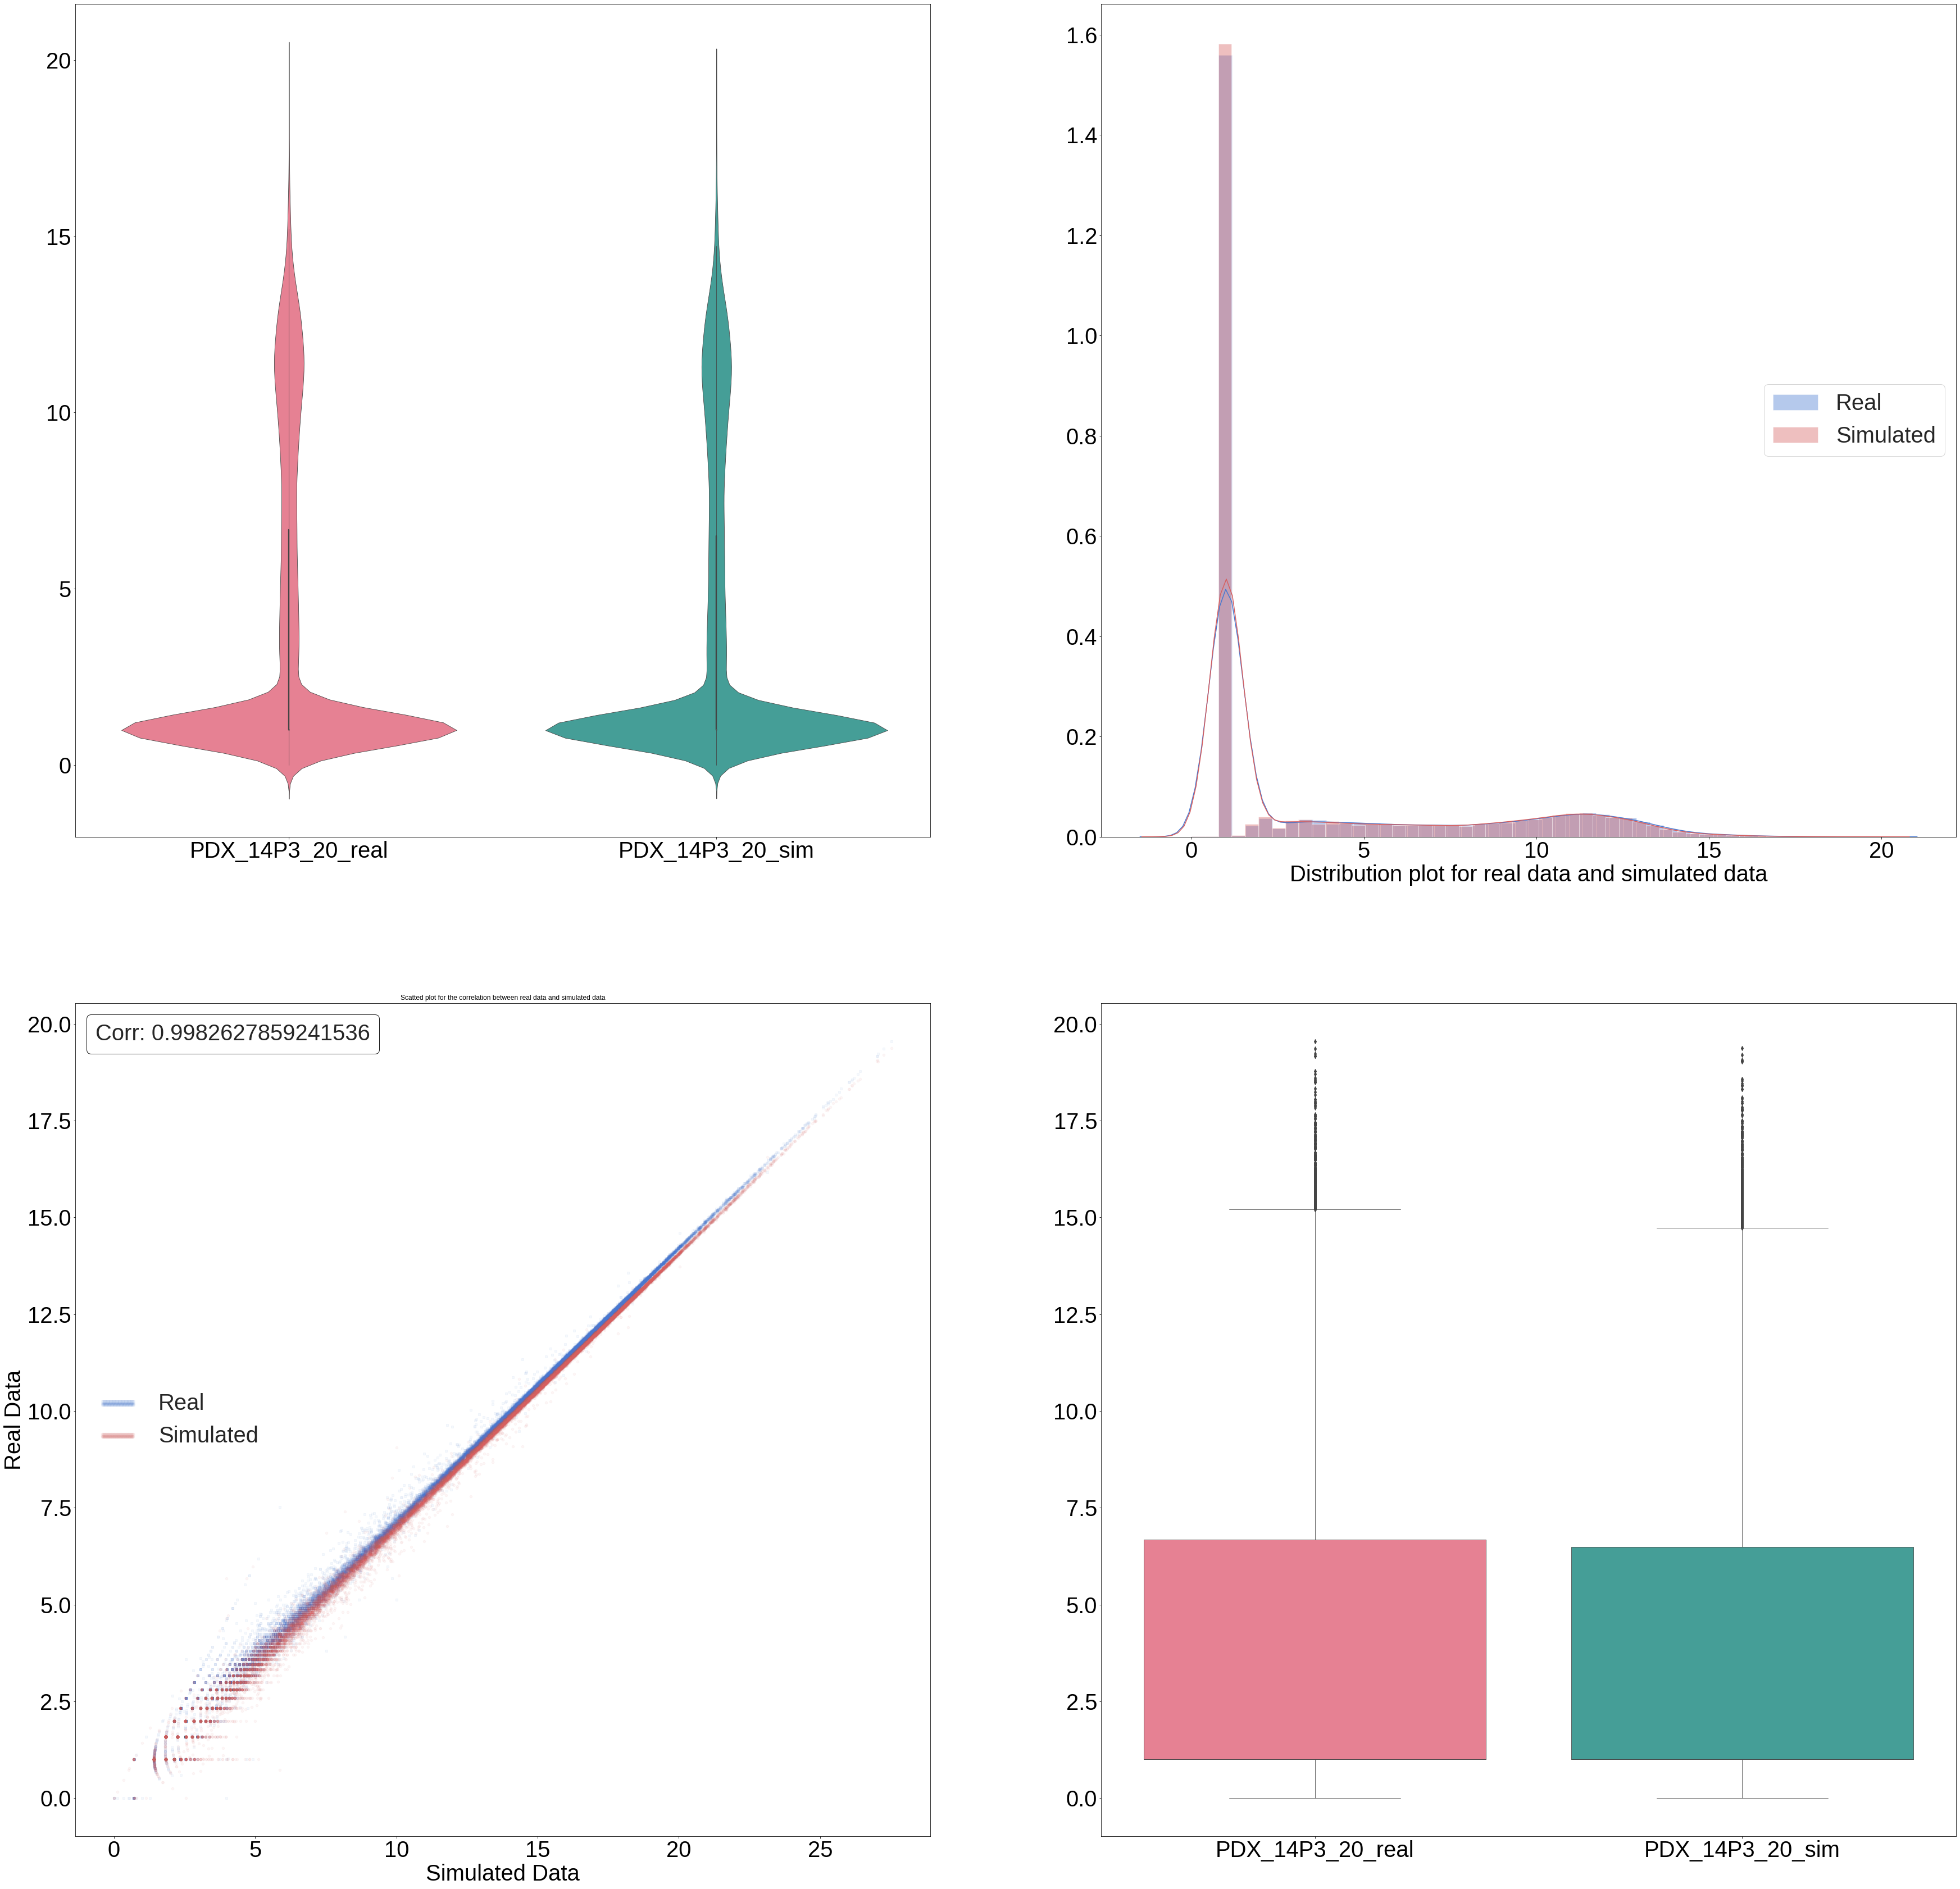

In [6]:
params = {'legend.fontsize': 40,
          'figure.figsize': (60, 60),
         'axes.labelsize': 40,
         'axes.titlesize': 40,
         'xtick.labelsize': 40,
         'ytick.labelsize': 40}
pylab.rcParams.update(params)
f, axes = plt.subplots(2, 2)
buildPlotBlock(full_data, axes)
plt.plot()

[]

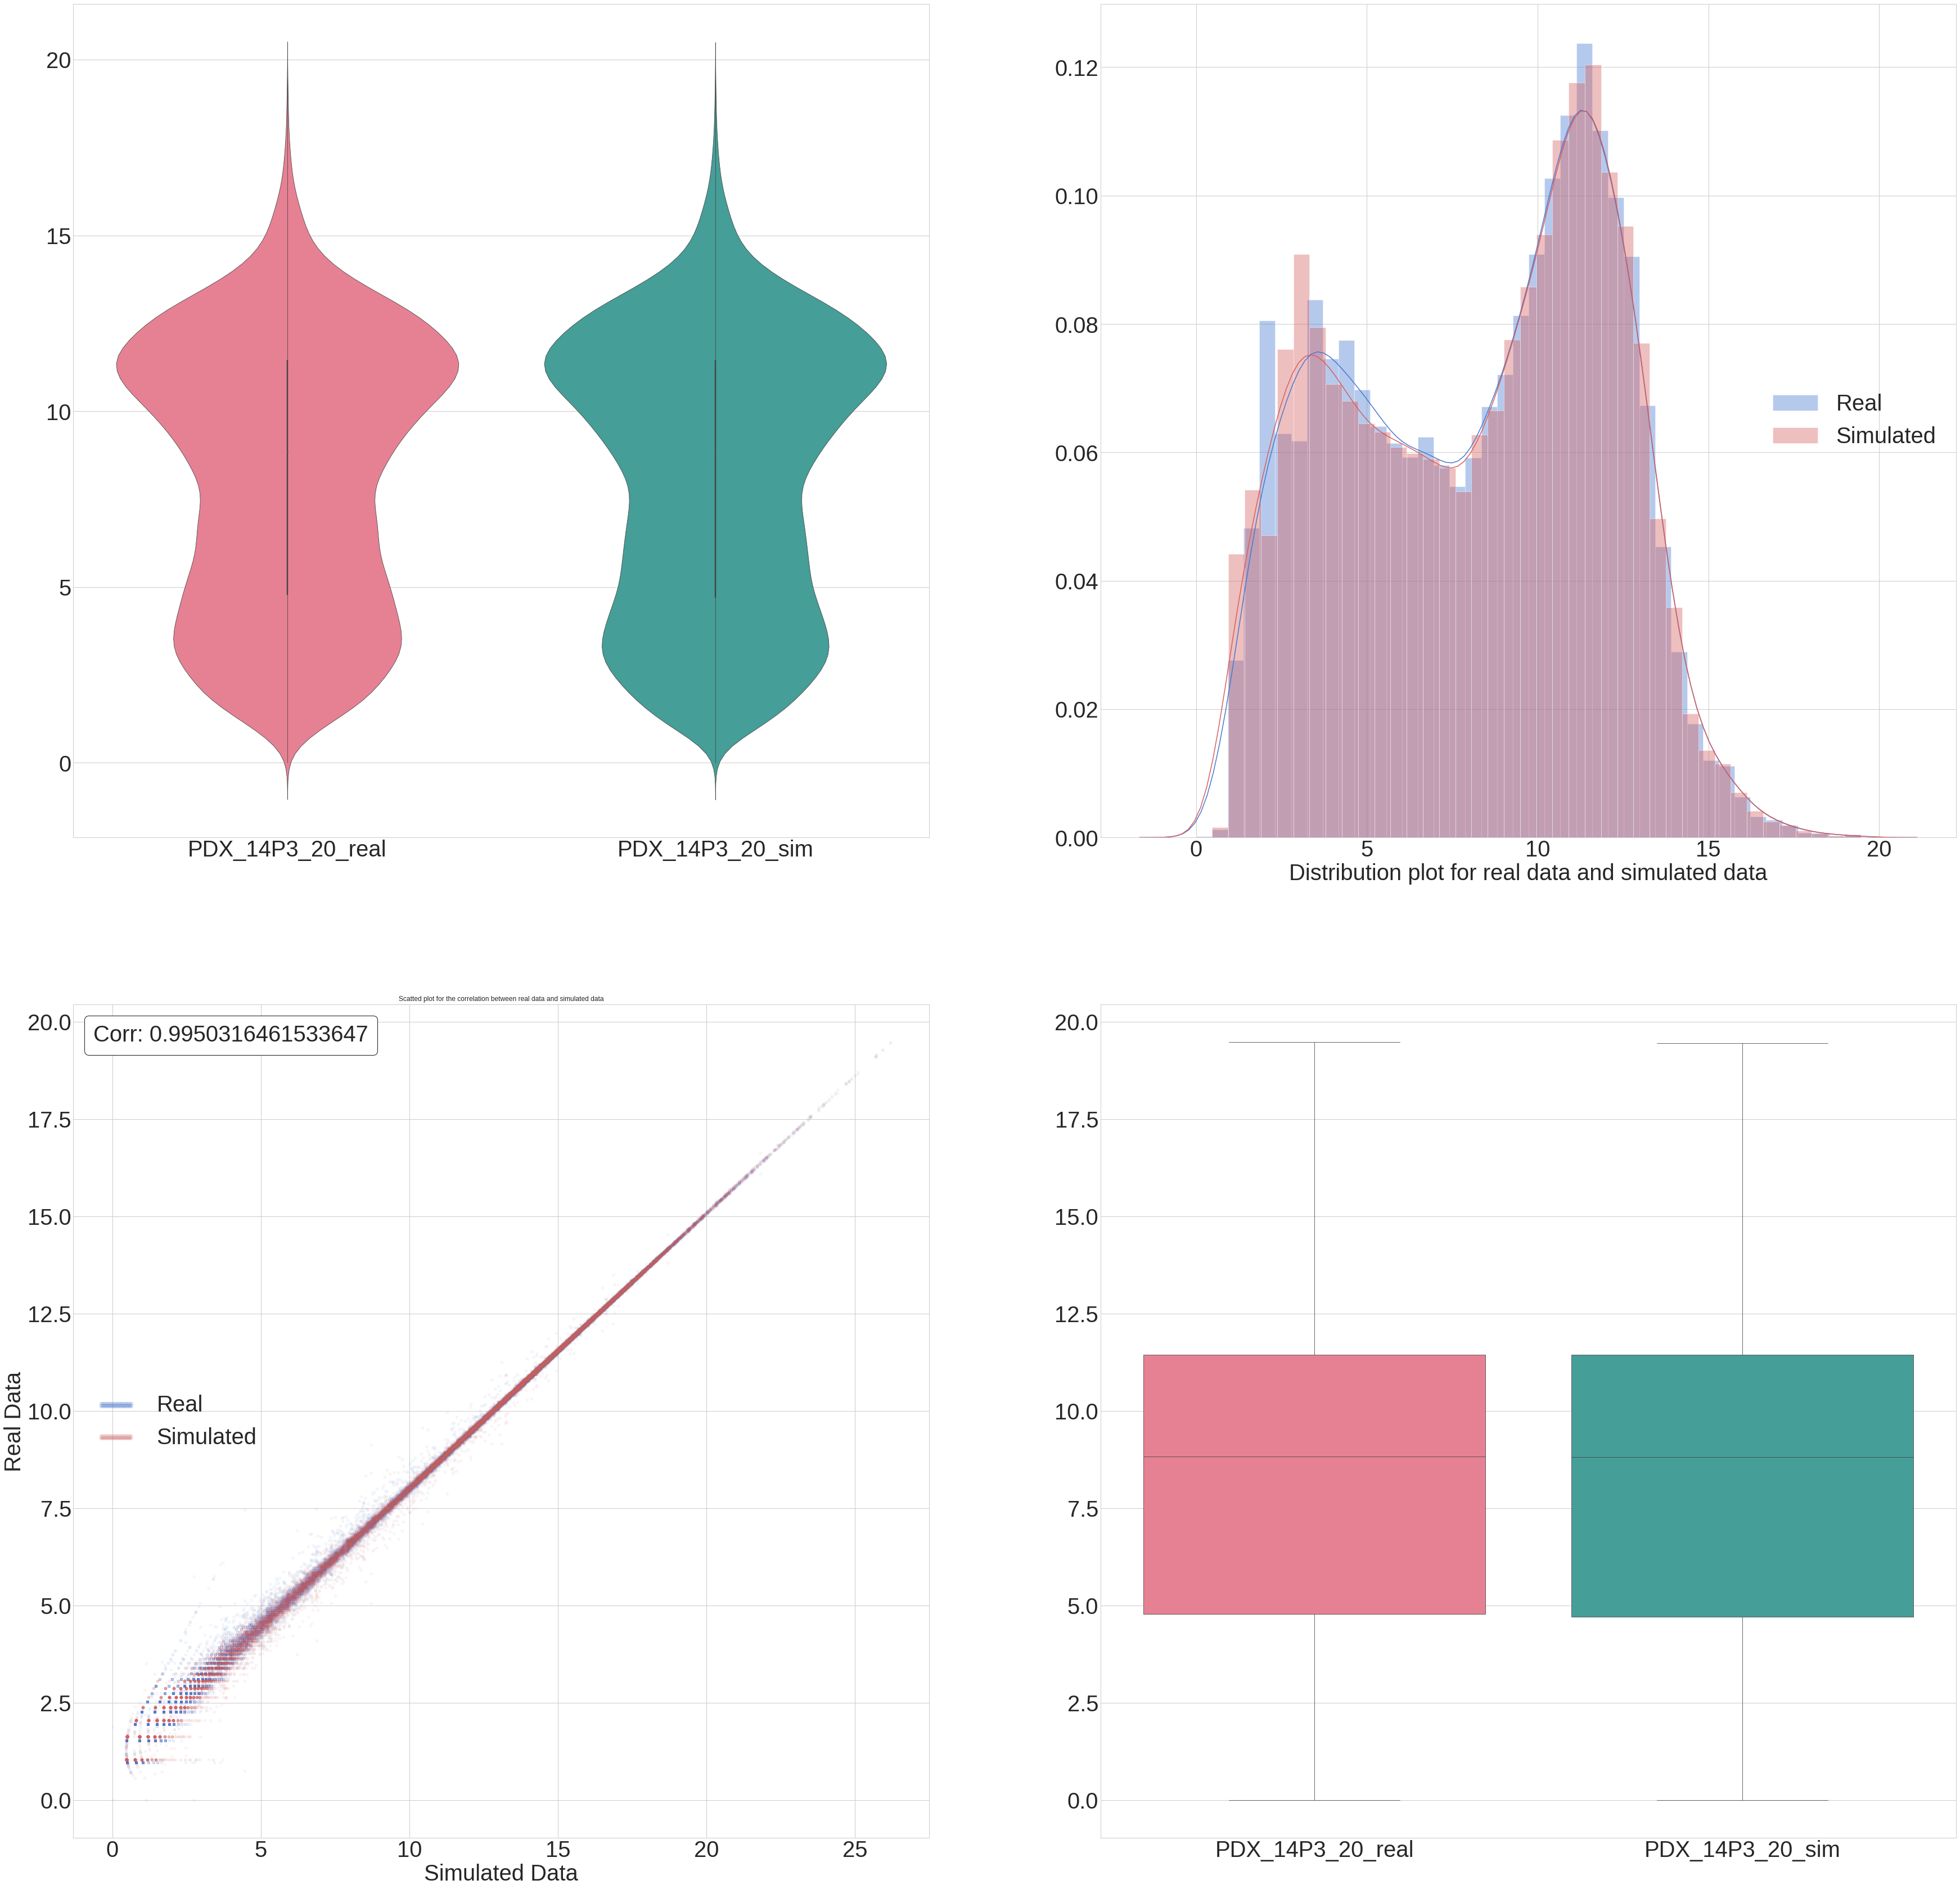

In [7]:
params = {'legend.fontsize': 40,
          'figure.figsize': (60, 60),
         'axes.labelsize': 40,
         'axes.titlesize': 40,
         'xtick.labelsize': 40,
         'ytick.labelsize': 40}
pylab.rcParams.update(params)
f, axes = plt.subplots(2, 2, figsize = (60, 60))
buildPlotBlock(quaterCut, axes)
plt.plot()

[]

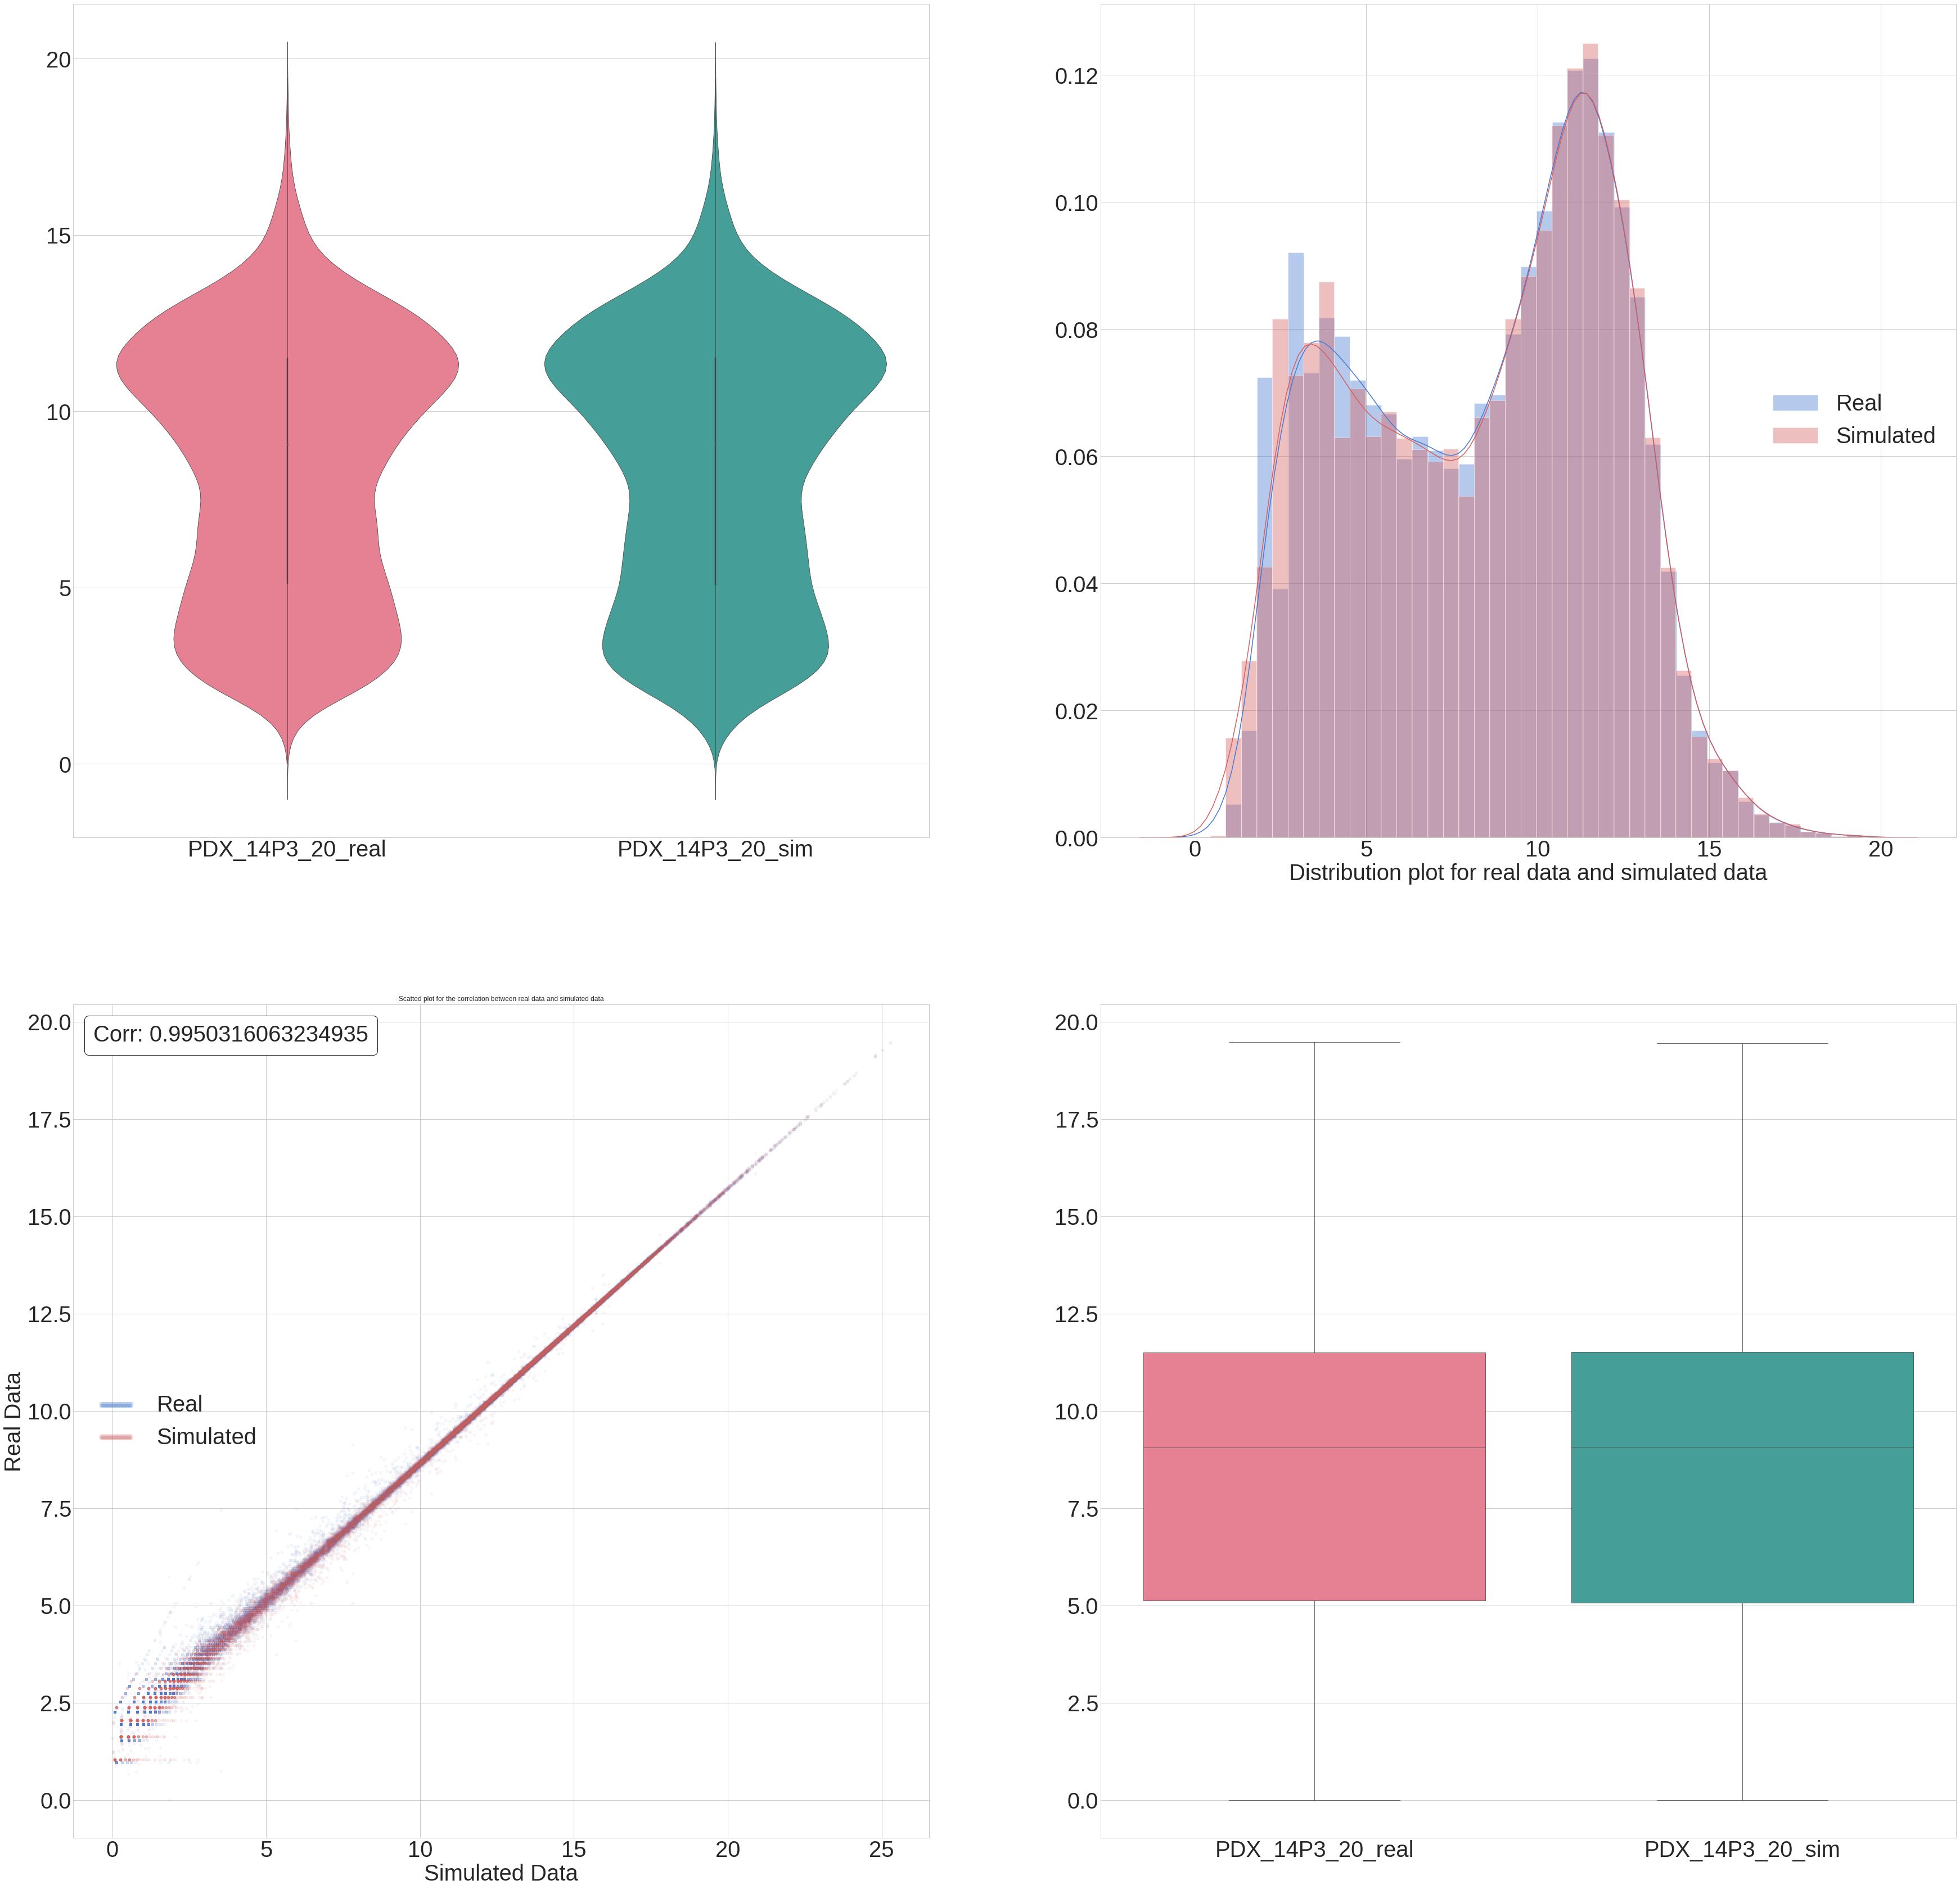

In [8]:
params = {'legend.fontsize': 40,
          'figure.figsize': (60, 60),
         'axes.labelsize': 40,
         'axes.titlesize': 40,
         'xtick.labelsize': 40,
         'ytick.labelsize': 40}
pylab.rcParams.update(params), 
f, axes = plt.subplots(2, 2, figsize = (60, 60))
buildPlotBlock(halfCut, axes)
plt.plot()

[]

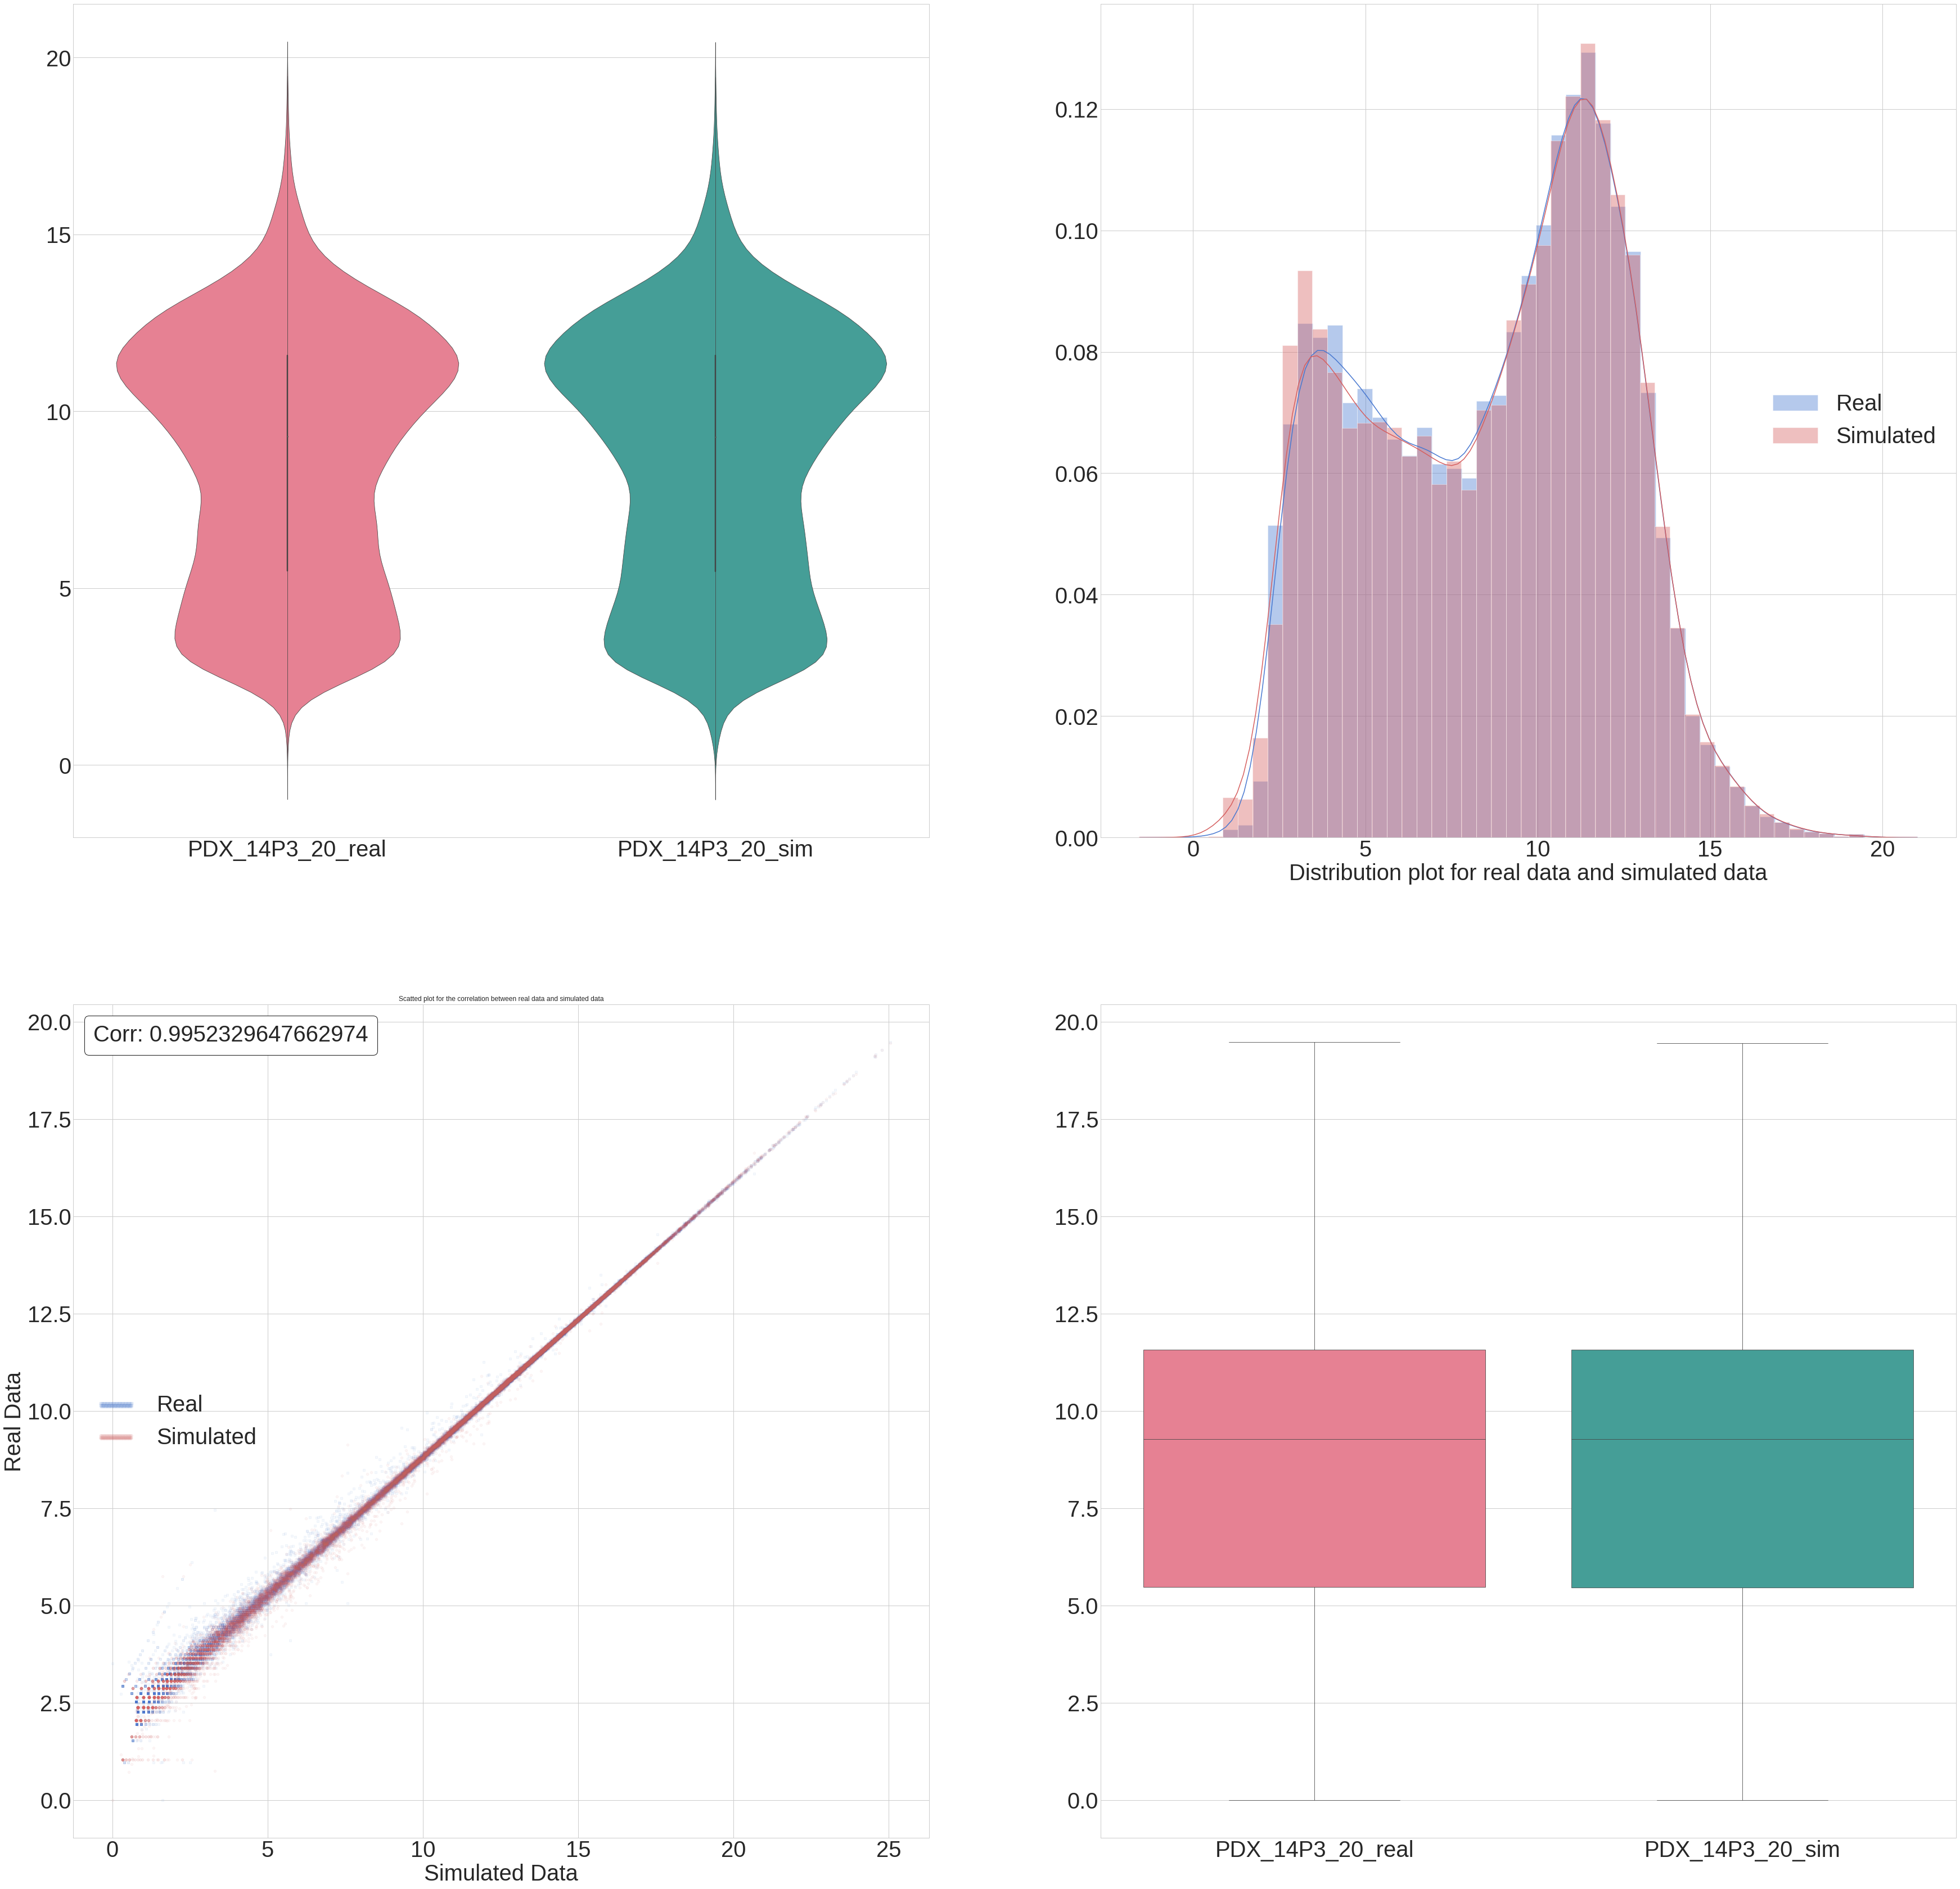

In [9]:
params = {'legend.fontsize': 40,
          'figure.figsize': (60, 60),
         'axes.labelsize': 40,
         'axes.titlesize': 40,
         'xtick.labelsize': 40,
         'ytick.labelsize': 40}
pylab.rcParams.update(params)
f, axes = plt.subplots(2, 2, figsize = (60, 60))
buildPlotBlock(threeQtrCut, axes)
plt.plot()

[]

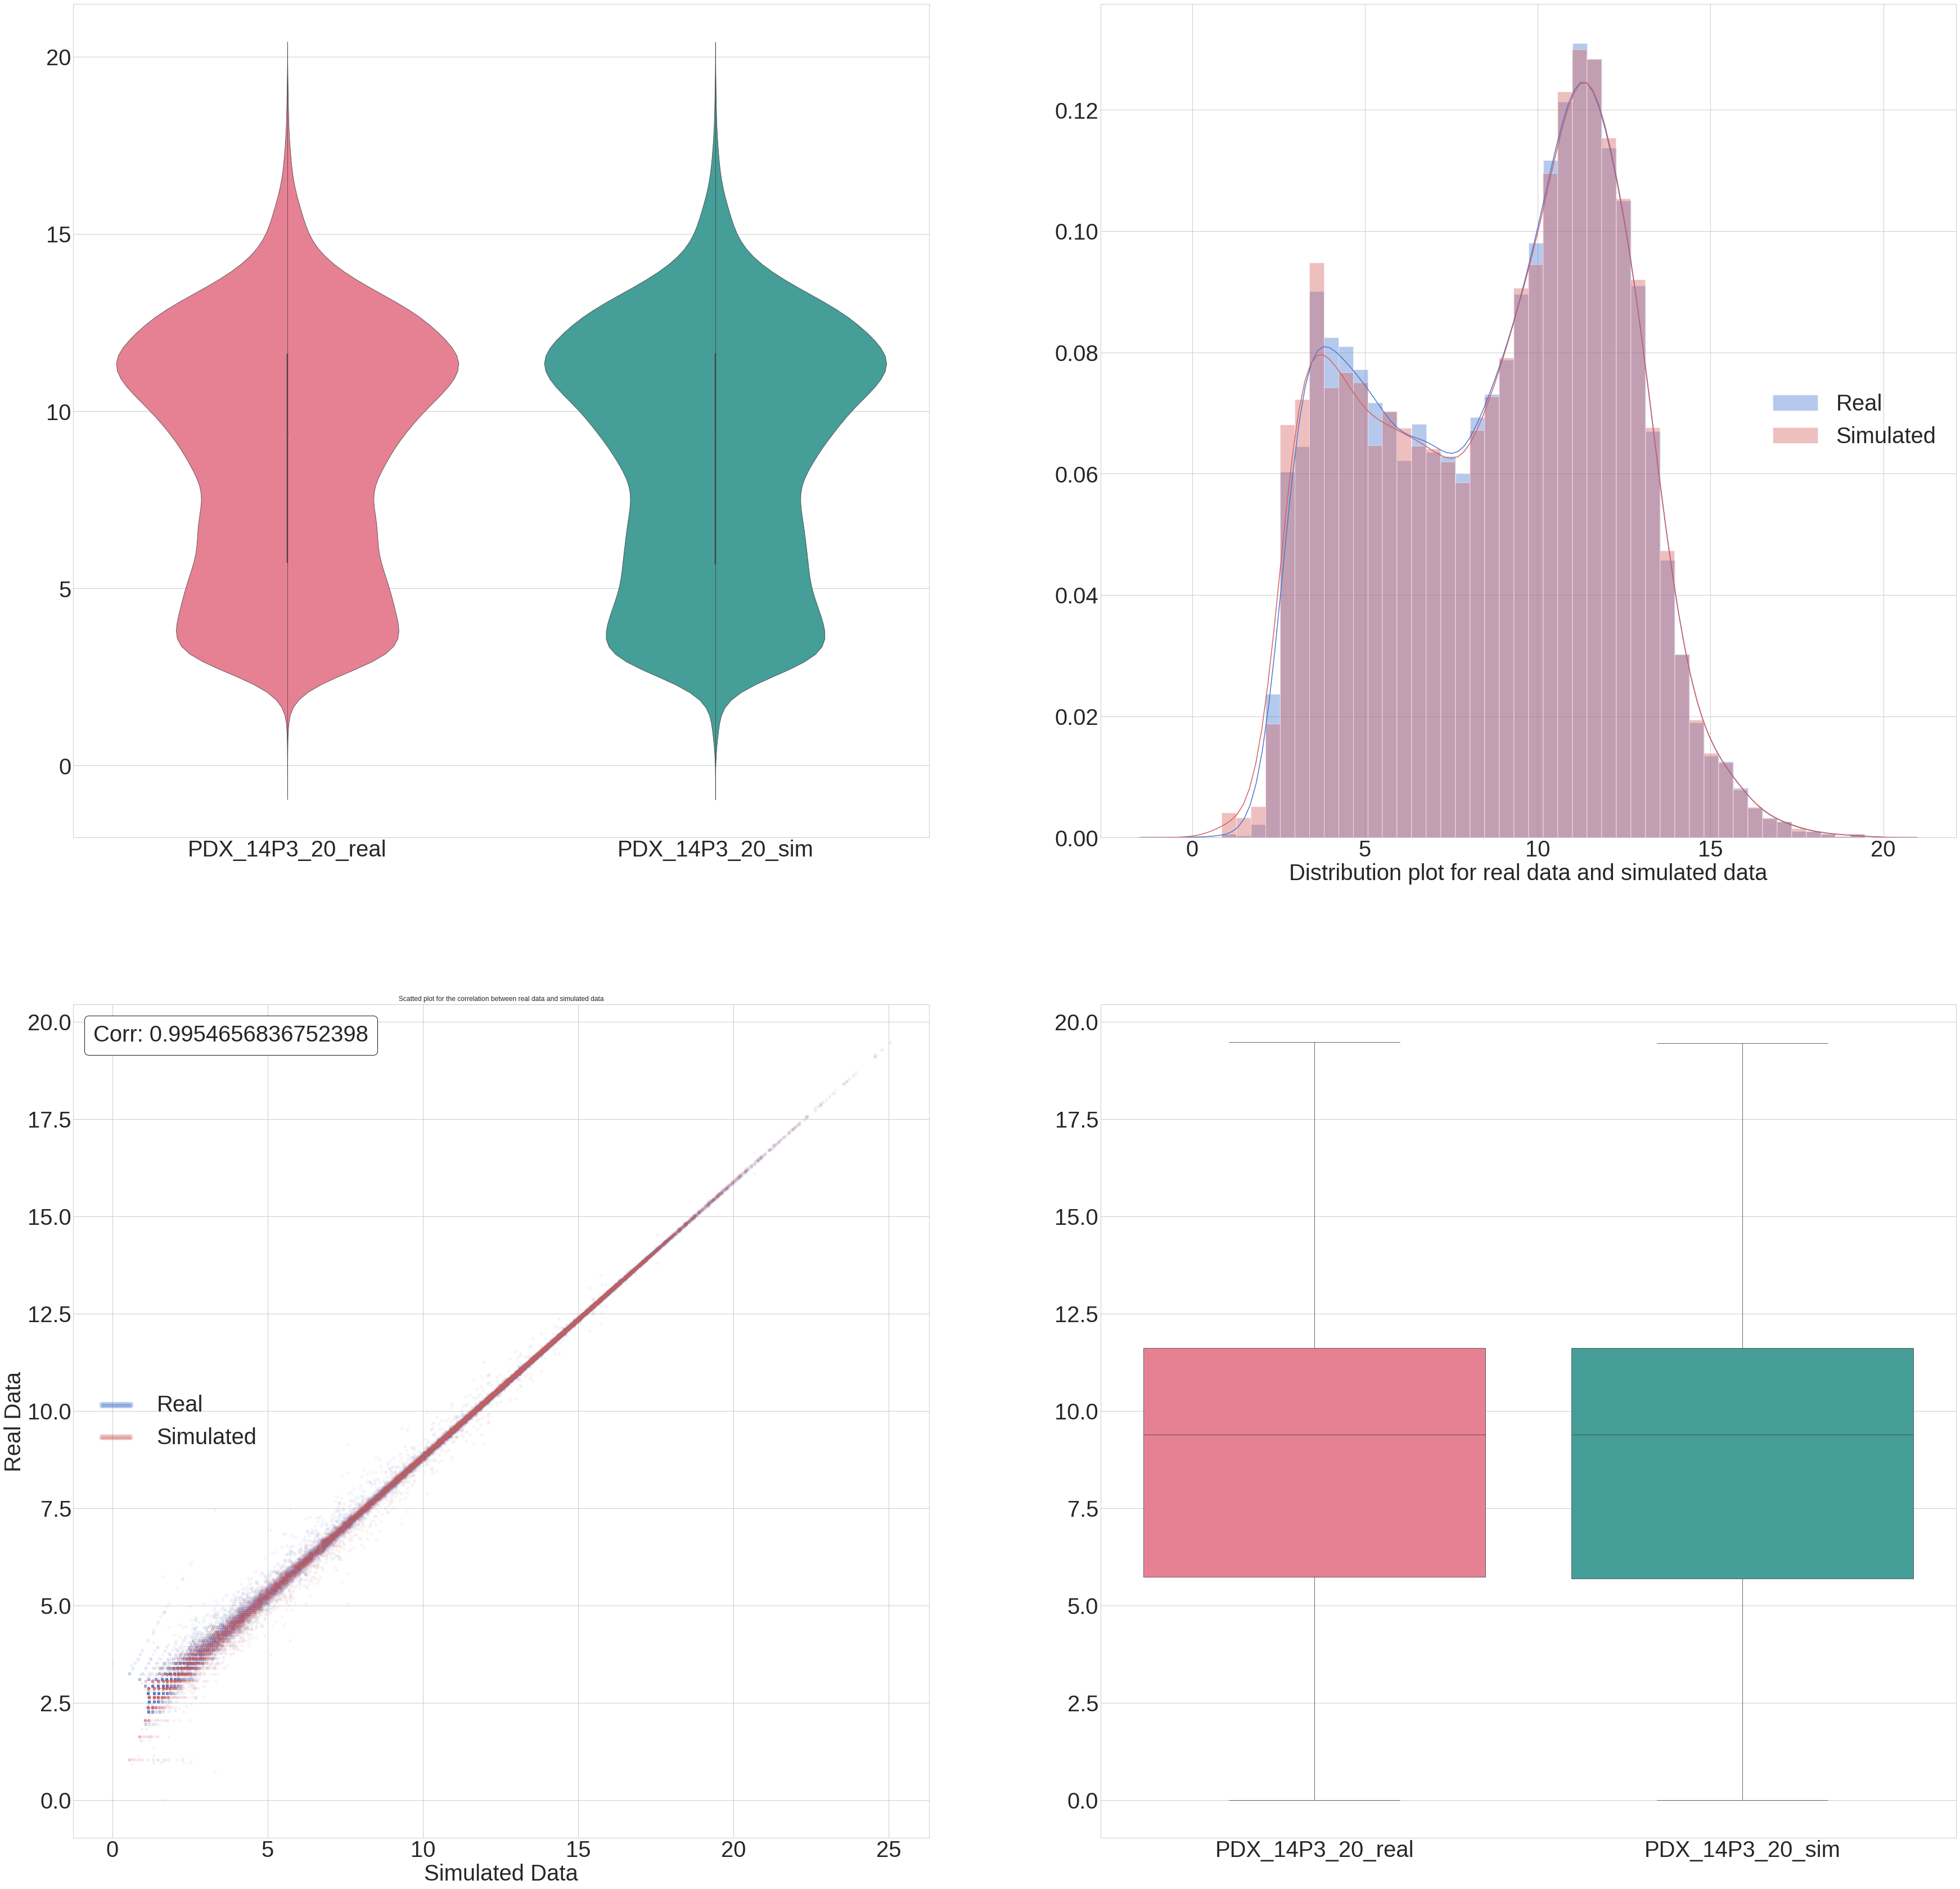

In [10]:
params = {'legend.fontsize': 40,
          'figure.figsize': (60, 60),
         'axes.labelsize': 40,
         'axes.titlesize': 40,
         'xtick.labelsize': 40,
         'ytick.labelsize': 40}
pylab.rcParams.update(params)
f, axes = plt.subplots(2, 2, figsize = (60, 60))
buildPlotBlock(tenCut, axes)
plt.plot()